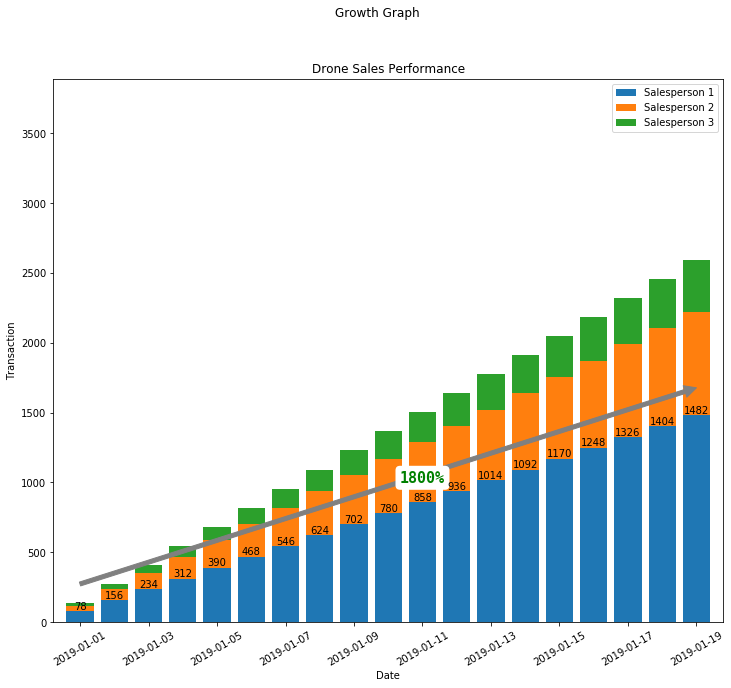

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

n = 20
s = 78
idx = pd.date_range(start='2019-01-01', periods=n-1)
data = np.arange(s, s*n, s)
data2 = np.arange(s/2, s*n/2, s/2)
data3 = np.arange(s/4, s*n/4, s/4)
df = pd.DataFrame(data={'sales':data, 'sales2': data2, 'sales3': data3 }, index=idx)
growth = (df['sales'][-1] - df['sales'][0])/df['sales'][0]
fig, ax = plt.subplots(1, 1, figsize=(12,10))
fig.suptitle('Growth Graph')
ax.bar(df.index, df['sales'], label='Salesperson 1')
ax.bar(df.index, df['sales2'], label='Salesperson 2', bottom=df['sales'])
ax.bar(df.index, df['sales3'], label='Salesperson 3', bottom=df['sales']+df['sales2'])
ax.tick_params(axis='x', rotation=30)
ax.margins(x=0.02,y=0.5)
ax.set_title('Drone Sales Performance')
ax.set_xlabel('Date')
ax.set_ylabel('Transaction')
ax.legend()
upheight = s*2.5

#create start and end points for arrow
xfpoint = dates.date2num(df.index[0])
yfpoint = df['sales'][0]  + upheight
ylpoint = df['sales'][-1] + upheight
xlpoint = dates.date2num(df.index[-1])

#create arrow
ax.annotate('', (xlpoint, ylpoint), xytext=(xfpoint, yfpoint), arrowprops=dict(width=4, color='grey'))

#create percentage in the middle of arrow
ax.text(dates.date2num(df.index[int(n/2)]), int(n*s/2+upheight*1.3), 
        "{0:.0%}".format(growth), fontsize=15, 
        verticalalignment='center', horizontalalignment='center', color='green', fontfamily='monospace', weight='bold',
        bbox=dict(facecolor='white', boxstyle='round', edgecolor='None'))

#annotate each bar
for x, y in zip(df.index, df['sales']):
    ax.annotate(y, (dates.date2num(x), y), horizontalalignment='center', verticalalignment='bottom')